In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn_predictor_v2/scikitlearn/default/1/churn_model_pipeline.pkl
/kaggle/input/customer-churn-records-test/Customer-Churn-Records.csv


In [2]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Re-declare the FeatureSelector class exactly like in training
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features, feature_names=None):
        self.selected_features = selected_features
        self.feature_names = feature_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X[self.selected_features]
        elif self.feature_names is not None:
            df = pd.DataFrame(X, columns=self.feature_names)
            return df[self.selected_features].values
        else:
            raise ValueError("Feature names must be provided when input is array")


In [3]:
import joblib
loaded_pipeline = joblib.load('/kaggle/input/churn_predictor_v2/scikitlearn/default/1/churn_model_pipeline.pkl')

In [4]:
df = pd.read_csv('/kaggle/input/customer-churn-records-test/Customer-Churn-Records.csv')

      Exited  Predicted_Exited  Prediction_Prob
6252       0                 0         0.109944
4684       0                 0         0.092707
1731       0                 0         0.237202
4742       0                 0         0.309677
4521       0                 0         0.154862


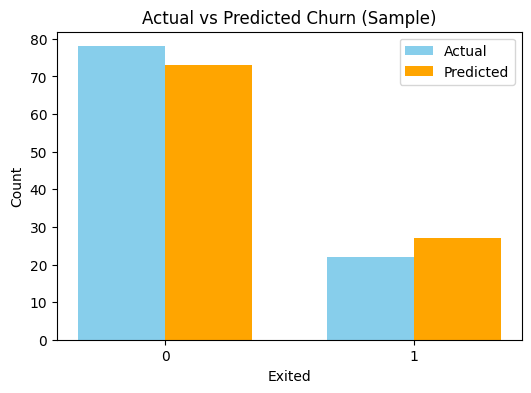

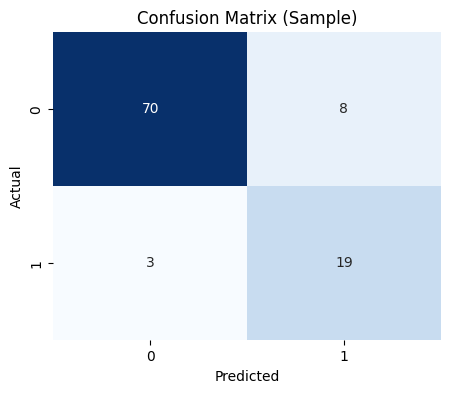

Classification Report (Sample):
              precision    recall  f1-score   support

           0     0.9589    0.8974    0.9272        78
           1     0.7037    0.8636    0.7755        22

    accuracy                         0.8900       100
   macro avg     0.8313    0.8805    0.8513       100
weighted avg     0.9028    0.8900    0.8938       100



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Your sample and prediction part
sample_df = df.sample(100, random_state=42).copy()
X_sample = sample_df.drop(columns=['Exited'])
y_sample = sample_df['Exited']

y_pred = loaded_pipeline.predict(X_sample)
y_proba = loaded_pipeline.predict_proba(X_sample)[:,1]

comparison_df = sample_df[['Exited']].copy()
comparison_df['Predicted_Exited'] = y_pred
comparison_df['Prediction_Prob'] = y_proba

print(comparison_df.head())

# 1️⃣ Grouped bar plot: count of each class for actual & predicted
actual_counts = comparison_df['Exited'].value_counts().sort_index()
pred_counts = comparison_df['Predicted_Exited'].value_counts().sort_index()

labels = [0, 1]
x = range(len(labels))

plt.figure(figsize=(6,4))
width = 0.35

plt.bar([i - width/2 for i in x], actual_counts, width=width, label='Actual', color='skyblue')
plt.bar([i + width/2 for i in x], pred_counts, width=width, label='Predicted', color='orange')

plt.xticks(x, labels)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Actual vs Predicted Churn (Sample)')
plt.legend()
plt.show()

# 2️⃣ Confusion matrix
cm = confusion_matrix(y_sample, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Sample)")
plt.show()

# 3️⃣ Classification report
print("Classification Report (Sample):")
print(classification_report(y_sample, y_pred, digits=4))